<a href="https://colab.research.google.com/github/rithulsandeep/ImageRec/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Define the file path
file_path = "/content/drive/My Drive/dataset_aiml_task/dataset_aiml_task/data.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info
print(df.info())  # Check column names, data types, and missing values
print(df.head())  # Display first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0    

In [4]:
print(df.isnull().sum())  # Ensure no missing data


label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


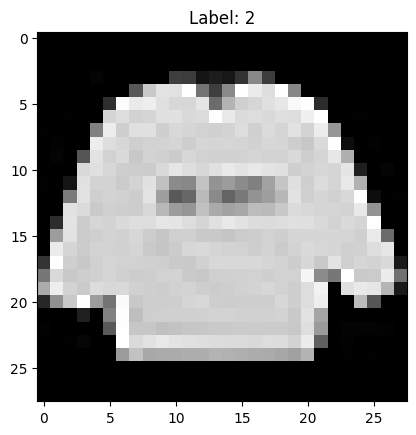

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Extract image data and labels
labels = df.iloc[:, 0].values  # Assuming the first column is the label
images = df.iloc[:, 1:].values  # The remaining columns are pixel values

# Convert first image to 28x28
first_image = images[0].reshape(28, 28)

# Plot the first image
plt.imshow(first_image, cmap="gray")
plt.title(f"Label: {labels[0]}")
plt.show()


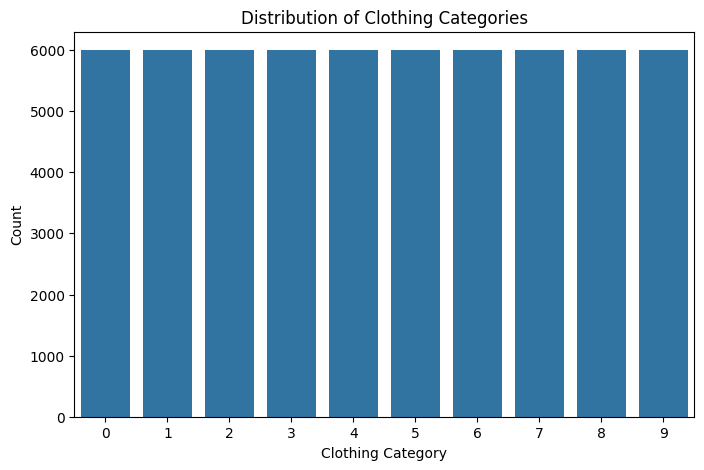

In [6]:
import seaborn as sns

# Plot label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=labels)
plt.xlabel("Clothing Category")
plt.ylabel("Count")
plt.title("Distribution of Clothing Categories")
plt.show()


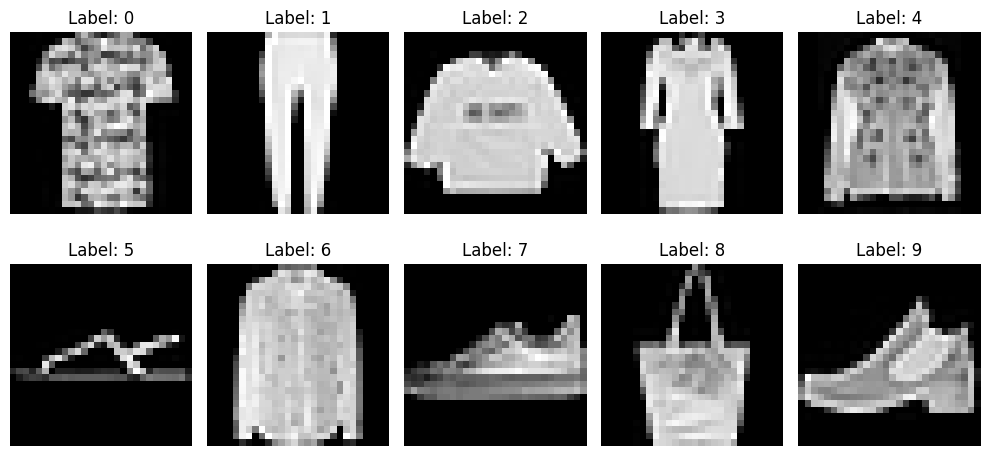

In [7]:
unique_labels = np.unique(labels)  # Get unique categories
plt.figure(figsize=(10, 5))

for i, label in enumerate(unique_labels[:10]):  # Assuming 10 categories
    plt.subplot(2, 5, i+1)
    idx = np.where(labels == label)[0][0]  # Get index of first image of this label
    plt.imshow(images[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [8]:
print("Pixel Value Statistics:")
print("Min:", np.min(images))
print("Max:", np.max(images))
print("Mean:", np.mean(images))
print("Standard Deviation:", np.std(images))


Pixel Value Statistics:
Min: 0
Max: 255
Mean: 72.9568306122449
Standard Deviation: 89.96686298512124


Level 2 - Basic Classification Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize pixel values (scale to 0-1)
images_normalized = images / 255.0

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images_normalized, labels, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (48000, 784)
Testing set size: (12000, 784)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.8515


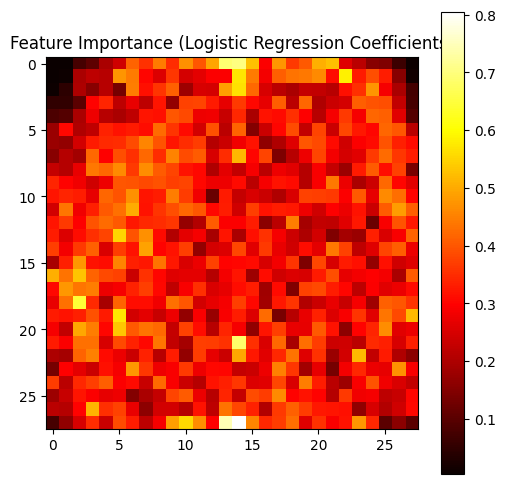

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get absolute coefficient values (importance)
importance = np.abs(model.coef_).mean(axis=0)

# Reshape importance to 28x28 (image format)
importance_image = importance.reshape(28, 28)

# Plot feature importance
plt.figure(figsize=(6,6))
plt.imshow(importance_image, cmap="hot")
plt.colorbar()
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()


Level 3 - Neural Network Implementation

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reshape for CNN input (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Data reshaped and ready for training!")


Data reshaped and ready for training!


In [14]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7661 - loss: 0.6527 - val_accuracy: 0.8658 - val_loss: 0.3593
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8798 - loss: 0.3243 - val_accuracy: 0.8929 - val_loss: 0.2942
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9001 - loss: 0.2740 - val_accuracy: 0.8894 - val_loss: 0.2997
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9137 - loss: 0.2343 - val_accuracy: 0.9038 - val_loss: 0.2617
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9233 - loss: 0.2102 - val_accuracy: 0.9020 - val_loss: 0.2621
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9334 - loss: 0.1832 - val_accuracy: 0.9053 - val_loss: 0.2649
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9404 - loss: 0.1597 - val_accuracy: 0.9064 - val_loss: 0.2690
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9473 - loss: 0.1385

In [16]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9064 - loss: 0.3036
Test Accuracy: 0.9022


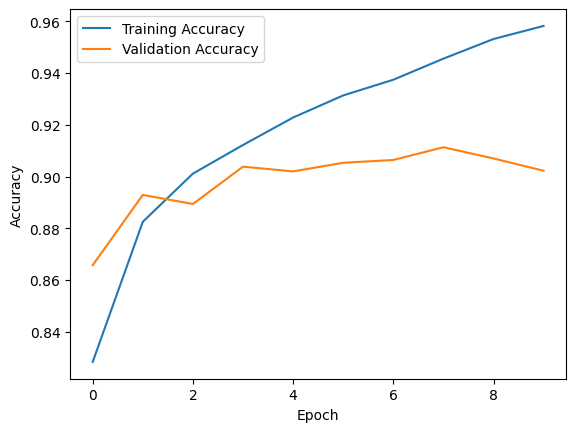

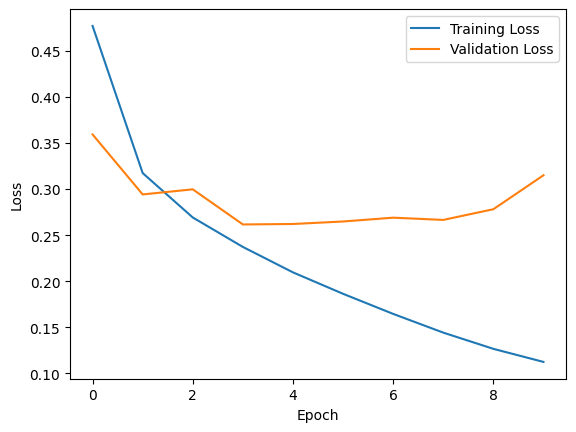

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
